In [87]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats

import statsmodels.api as sm

%matplotlib inline

In [88]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")
print(gdp_df.head())
print(gdp_df.tail())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2018  1734.723214              NaN
1     Afghanistan  2017  1758.465636              NaN
2     Afghanistan  2016  1757.023490              NaN
3     Afghanistan  2015  1766.593077              NaN
4     Afghanistan  2014  1795.735834              NaN
     Country or Area                                      Year        Value  \
6726        Zimbabwe                                      1992  2591.007534   
6727        Zimbabwe                                      1991  2906.272849   
6728        Zimbabwe                                      1990  2819.549467   
6729   footnoteSeqID                                  Footnote          NaN   
6730               2  Excludes South Sudan after July 9, 2011.          NaN   

      Value Footnotes  
6726              NaN  
6727              NaN  
6728              NaN  
6729              NaN  
6730              NaN  


In [89]:
gdp_df.drop(gdp_df.tail(2).index,inplace=True)
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [90]:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)

In [91]:
gdp_df.rename(columns = {"Country or Area": "Country"},  
          inplace = True) 

In [92]:
gdp_df.rename(columns = {"Value":"GDP_Per_Capita"},  
          inplace = True) 
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [93]:
gdp_df.shape

(6729, 3)

### Question 7

gdp_df has 6,731 rows and 3 columns

Types:
Country: Object
Year: Object
GDP_Per_Capita: Float

In [94]:
gdp_df.dtypes

Country            object
Year               object
GDP_Per_Capita    float64
dtype: object

In [95]:
gdp_df.dropna(inplace = True)
gdp_df['Year'] = gdp_df['Year'].astype(int)

In [96]:
gdp_df.dtypes

Country            object
Year                int32
GDP_Per_Capita    float64
dtype: object

In [97]:
print(gdp_df['Year'].min())
print(gdp_df['Year'].max())

1990
2018


In [106]:
gdp_df['Year'].value_counts().sort_index()


1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
Name: Year, dtype: int64

### Question 8
There are more observations around...

In [108]:
gdp_df.pivot_table(index=['Country'], aggfunc='size')

Country
Afghanistan            17
Albania                29
Algeria                29
Angola                 29
Antigua and Barbuda    29
                       ..
West Bank and Gaza     25
World                  29
Yemen                  29
Zambia                 29
Zimbabwe               29
Length: 243, dtype: int64

### Question 9

How many countries are represented in this dataset? 

Which countries are least represented in the dataset? 

Why do you think these countries have so few observations?

In [102]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]
print(gdp_2014.head())
gdp_df.describe()

                 Country  Year  GDP_Per_Capita
4            Afghanistan  2014     1795.735834
21               Albania  2014    10700.993216
50               Algeria  2014    13557.769757
79                Angola  2014     6813.052106
108  Antigua and Barbuda  2014    20440.540555


,Year,GDP_Per_Capita
count,6729.000000,6729.000000
mean,2004.293357,15468.017091
std,8.269834,17995.866104
min,1990.000000,438.643111
25%,1997.000000,3170.407545
50%,2004.000000,8959.240204
75%,2011.000000,20940.081023
max,2018.000000,134959.989044


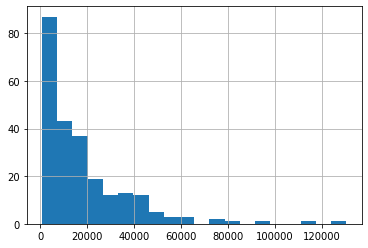

In [105]:
gdp_2014['GDP_Per_Capita'].hist(bins = 20)

### Question 12
Looks like half of a normal distribution that got cut off at zero. Skewed to the right.